In [1]:
import pandas as pd                       # importing modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = pd.read_csv("customer_analysis_new.csv") # readind the data for onward analyses
#file

In [3]:
#file.dtypes             # checking the data types to see list of objects and numeric values for insight

In [5]:
numerical = file.select_dtypes(np.number) # extracting numerical data from the main data for analyses
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
4,5035.035257,37405,63,8.0,99,3.0,4,287.556107,2
...,...,...,...,...,...,...,...,...,...
9129,2771.663013,59855,74,30.0,82,4.0,1,355.200000,1
9130,19228.463620,0,187,14.0,32,0.0,2,897.600000,2
9131,5259.444853,61146,65,7.0,68,0.0,6,273.018929,1
9132,23893.304100,39837,201,11.0,63,0.0,2,381.306996,2


In [6]:
#xxxxx = numerical.columns[numerical.isna().any()].tolist()
print(numerical.isna().any())

customer_lifetime_value          False
income                           False
monthly_premium_auto             False
months_since_last_claim          False
months_since_policy_inception    False
number_of_open_complaints        False
number_of_policies               False
total_claim_amount               False
month                            False
dtype: bool


In [7]:
print(numerical.isnull().any())

customer_lifetime_value          False
income                           False
monthly_premium_auto             False
months_since_last_claim          False
months_since_policy_inception    False
number_of_open_complaints        False
number_of_policies               False
total_claim_amount               False
month                            False
dtype: bool


In [8]:
#mean_income = numerical['Income'].mean()
#numerical['Income'] = numerical['Income'].replace(0, numerical['Income'].mean())
#numerical['Number of Open Complaints'] = numerical['Number of Open Complaints'].replace(0, numerical['Number of Open Complaints'].mean())
#numerical['Months Since Last Claim'] = numerical['Months Since Last Claim'].replace(0, numerical['Months Since Last Claim'].mean())
#numerical['Months Since Policy Inception'] = numerical['Months Since Policy Inception'].replace(0, numerical['Months Since Policy Inception'].mean())
#numerical['Unnamed: 0'] = numerical['Unnamed: 0'].replace(0, numerical['Unnamed: 0'].mean())
#numerical = numerical.drop('Income', axis = 1)
#numerical = numerical.drop('Months Since Policy Inception', axis = 1)
#numerical = numerical.drop('Customer Lifetime Value', axis = 1)
#numerical = numerical.drop('Months Since Last Claim', axis = 1)

In [9]:
#numerical['Unnamed: 0 '] = numerical['Unnamed: 0 '].replace(0, numerical['Unnamed: 0 '].mean())

In [10]:
nonzero_counts = (numerical != 0).sum()
print(nonzero_counts)

customer_lifetime_value          9134
income                           6817
monthly_premium_auto             9134
months_since_last_claim          8820
months_since_policy_inception    9051
number_of_open_complaints        1882
number_of_policies               9134
total_claim_amount               9134
month                            9134
dtype: int64


In [12]:
categorical = file.select_dtypes(object)     # extracting categorical data
categorical

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2011-02-18,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,M
1,KX64629,California,No,Basic,College,2011-01-18,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,M
2,LZ68649,Washington,No,Basic,Bachelor,2011-02-10,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,2011-01-11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,IW72280,California,No,Basic,Doctor,2011-02-14,Employed,F,Urban,Married,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car,Medsize,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,SU71163,Arizona,No,Basic,College,2011-01-07,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize,A
9130,QI63521,Nevada,No,Basic,High School or Below,2011-02-24,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Luxury SUV,Medsize,A
9131,KX53892,Oregon,No,Basic,College,2011-01-06,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
9132,TL39050,Arizona,No,Extended,Bachelor,2011-02-06,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,M


In [13]:
numerical.head()   # headings of the numerical data

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
4,5035.035257,37405,63,8.0,99,3.0,4,287.556107,2


In [14]:
numerical.describe().T # transposing the data for further analyses especially with respect to correlation 

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678
month,9134.0,1.463762,0.498712,1.000000,1.000000,1.000000,2.000000,2.000000


In [19]:
unknown_value = numerical['monthly_premium_auto'].tolist()
#print(unknown_value)

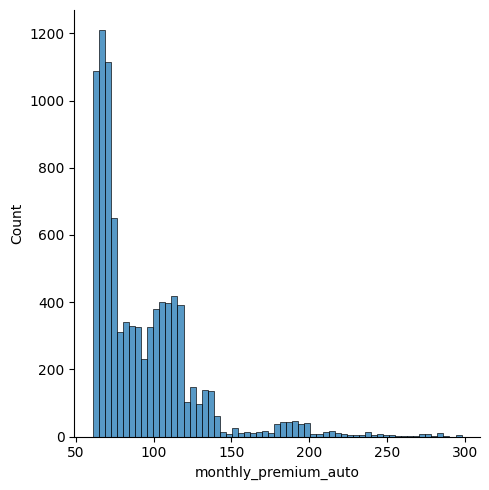

In [20]:
sns.displot(numerical['monthly_premium_auto']) # distribution graph for 'Customer Lifetime Value' in view of the presence of errors
plt.show()

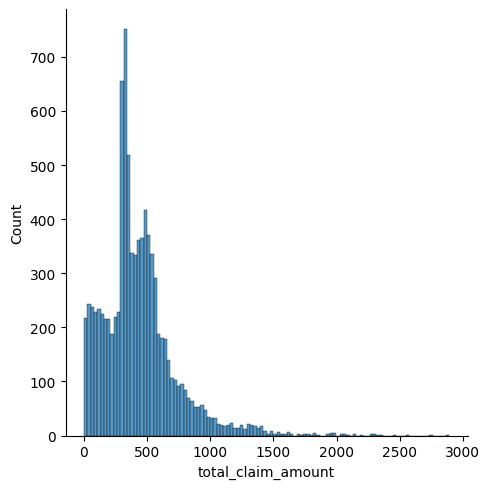

In [23]:
sns.displot(numerical['total_claim_amount'])    # distribution for 'Total Claim Amount'
#plt.show()

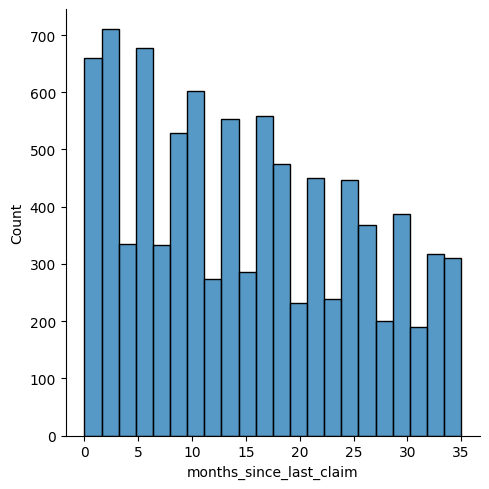

In [24]:
sns.displot(numerical["months_since_last_claim"]) # distribution for 'Monthly Premium Auto'
#plt.show

<Axes: >

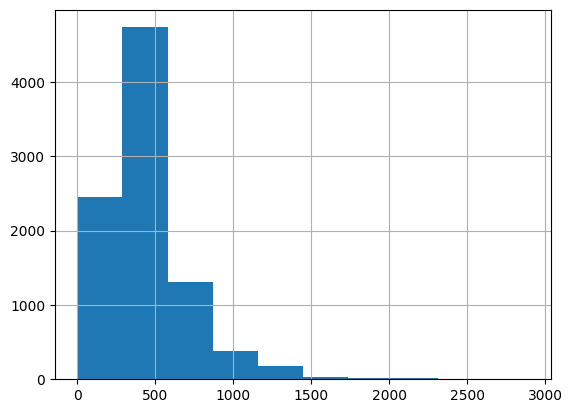

In [25]:
numerical["total_claim_amount"].hist()                    # histogrm for 'Total Claim Amount'
#plt.show

<Axes: xlabel='monthly_premium_auto'>

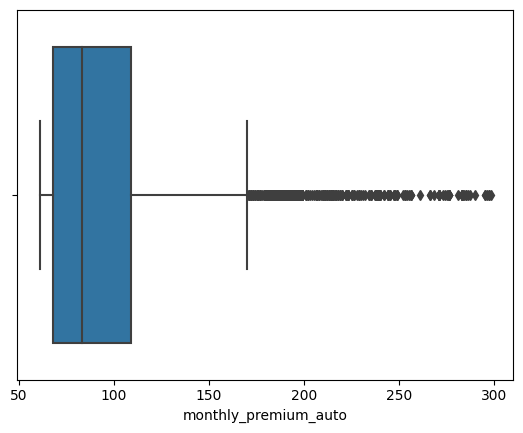

In [26]:
sns.boxplot(x=numerical['monthly_premium_auto'])  # boxplot for the assessment of errors in the data using the upper and lower limits as thresholds for determining outliers
#plt.show()

In [27]:
iqr = np.percentile(numerical['monthly_premium_auto'],75) - np.percentile(numerical['monthly_premium_auto'],25)
upper_limit = np.percentile(numerical['monthly_premium_auto'],75) + 0.44*iqr
lower_limit = np.percentile(numerical['monthly_premium_auto'],25) - 0.00045*iqr # finding upper and lower limits to used in refining the results

In [28]:
iqr


41.0

In [29]:
upper_limit

127.03999999999999

In [30]:
lower_limit

67.98155

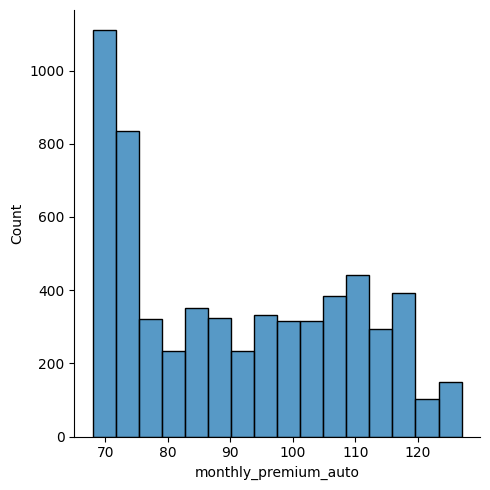

In [31]:
numerical1 = numerical[(numerical['monthly_premium_auto']>lower_limit) & (numerical['monthly_premium_auto']<upper_limit)].copy()
sns.displot(numerical1['monthly_premium_auto'])
#plt.show()   # applying the result to determine if the data can is normally distributed after cleaning; but not so good

<Axes: xlabel='total_claim_amount'>

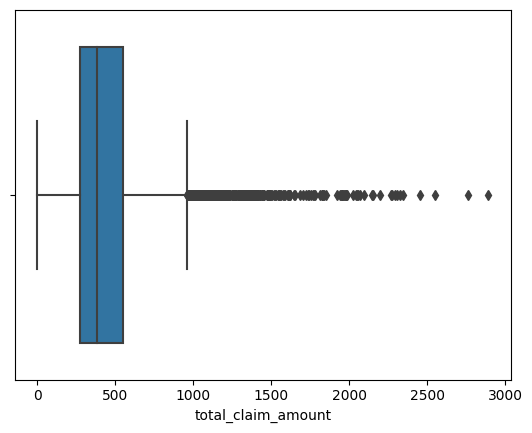

In [32]:
sns.boxplot(x=numerical['total_claim_amount'])    # boxplot for 'Total Claim Amount'
#plt.show()

In [26]:
iqr = np.percentile(numerical['total_claim_amount'],75) - np.percentile(numerical['total_claim_amount'],25)
upper_limit = np.percentile(numerical['total_claim_amount'],75) + 0.9*iqr
lower_limit = np.percentile(numerical['total_claim_amount'],25) - 0.51*iqr   # same as above, but for 'Total Claim Amount'

In [27]:
iqr

276.11747325000005

In [28]:
upper_limit

795.705725925

In [29]:
lower_limit

130.26261539249998

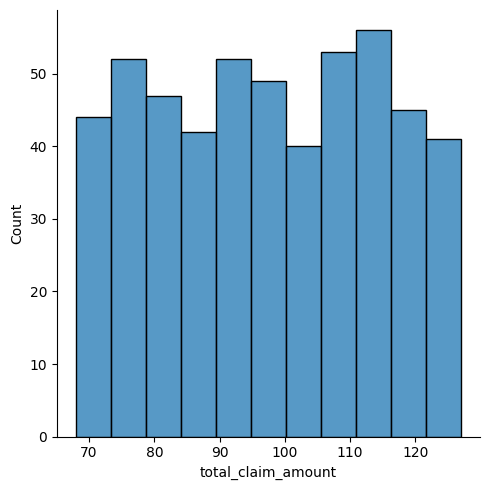

In [33]:
numerical1 = numerical[(numerical['total_claim_amount']>lower_limit) & (numerical['total_claim_amount']<upper_limit)].copy()
sns.displot(numerical1['total_claim_amount'])   # normality not so good
#plt.show()

In [36]:
numerical1 = numerical.drop("total_claim_amount", axis = 1) # 'Total Claim Amount' dropped from DataFrame in order to use only the features alone for further nalyses and prediction
numerical1

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month
0,4809.216960,48029,61,7.0,52,0.0,9,2
1,2228.525238,0,64,3.0,26,0.0,1,1
2,14947.917300,22139,100,34.0,31,0.0,2,2
3,22332.439460,49078,97,10.0,3,0.0,2,1
4,5035.035257,37405,63,8.0,99,3.0,4,2
...,...,...,...,...,...,...,...,...
9129,2771.663013,59855,74,30.0,82,4.0,1,1
9130,19228.463620,0,187,14.0,32,0.0,2,2
9131,5259.444853,61146,65,7.0,68,0.0,6,1
9132,23893.304100,39837,201,11.0,63,0.0,2,2


In [37]:
correlations_matrix = numerical1.corr()     # correlation matrix to see pairs that influence each other
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,-0.006096
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,0.000169
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.011467
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,-0.020921
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.011010
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.006335
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,0.009305
month,-0.006096,0.000169,0.011467,-0.020921,0.011010,-0.006335,0.009305,1.000000


<Axes: >

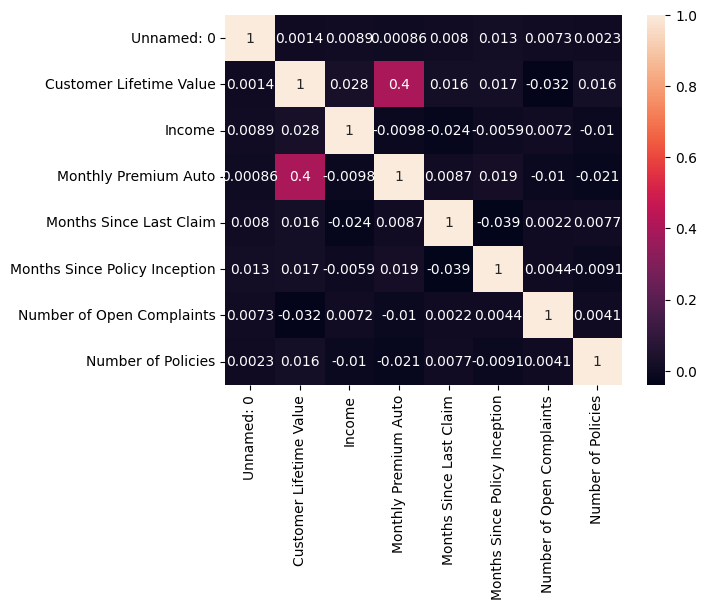

In [33]:
sns.heatmap(correlations_matrix, annot=True) # heat map using colours to show level of correlation. with black showing the least correlated pairs. Correlation here is very low for all except self correlated pairs 
#plt.show()

# Splitting and Scaling the Data

In [40]:
import math
from sklearn import linear_model

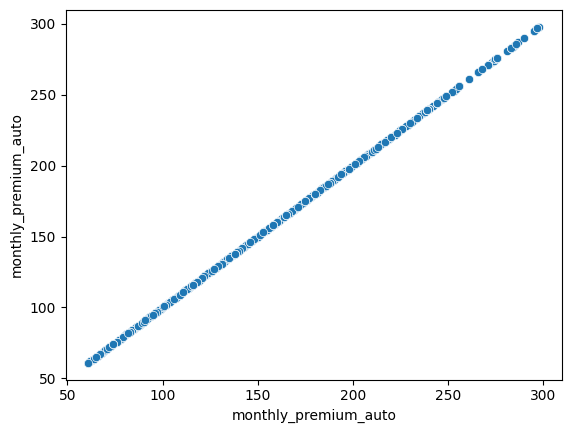

In [41]:
sns.scatterplot(x=numerical1['monthly_premium_auto'], y=numerical['monthly_premium_auto'], data = file)
plt.show()

In [42]:
from sklearn.preprocessing import MinMaxScaler # # importing libraries for trnaformation
from sklearn.preprocessing import StandardScaler

In [47]:
y = numerical['monthly_premium_auto']                       #splitting X and y
X = numerical.drop(['monthly_premium_auto'], axis=1)
X.fillna(0, inplace = True)
X_num = X.select_dtypes(include = np.number)
#X_cat = X.select_dtypes(include = object)         

In [48]:
#X_num.fillna(0.1, inplace = True)
#X_num


In [49]:
transformer = MinMaxScaler().fit(X_num) # normalising numerical
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
x_normalized = pd.DataFrame(x_normalized, columns=X_num.columns)

(9134, 8)


In [50]:
pd.DataFrame(x_normalized, columns=X_num.columns).corr()

,customer_lifetime_value,income,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
customer_lifetime_value,1.000000,0.024366,0.011517,0.009418,-0.036343,0.021955,0.226451,-0.006096
income,0.024366,1.000000,-0.026715,-0.000875,0.006408,-0.008656,-0.355254,0.000169
months_since_last_claim,0.011517,-0.026715,1.000000,-0.042959,0.005354,0.009136,0.007563,-0.020921
months_since_policy_inception,0.009418,-0.000875,-0.042959,1.000000,-0.001158,-0.013333,0.003335,0.011010
number_of_open_complaints,-0.036343,0.006408,0.005354,-0.001158,1.000000,0.001498,-0.014241,-0.006335
number_of_policies,0.021955,-0.008656,0.009136,-0.013333,0.001498,1.000000,-0.002354,0.009305
total_claim_amount,0.226451,-0.355254,0.007563,0.003335,-0.014241,-0.002354,1.000000,0.006820
month,-0.006096,0.000169,-0.020921,0.011010,-0.006335,0.009305,0.006820,1.000000


In [51]:
transformer = StandardScaler().fit(X_num) # alternative method for normalising the data
x_standardized = transformer.transform(X_num)
print(x_standardized.shape)
pd.DataFrame(x_standardized, columns=X_num.columns)

(9134, 8)


,customer_lifetime_value,income,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,-0.465131,0.341416,-0.803856,0.141031,-0.422250,2.524561,-0.486391,1.075304
1,-0.840745,-1.239617,-1.200968,-0.790719,-0.422250,-0.822648,1.070060,-0.929969
2,1.010536,-0.510839,1.876656,-0.611536,-0.422250,-0.404247,0.158051,1.075304
3,2.085337,0.375947,-0.506021,-1.614960,-0.422250,-0.404247,0.171867,-0.929969
4,-0.432263,-0.008308,-0.704577,1.825350,2.873245,0.432555,-0.504443,1.075304
...,...,...,...,...,...,...,...,...
9129,-0.761692,0.730708,1.479543,1.216128,3.971744,-0.822648,-0.271577,-0.929969
9130,1.633560,-1.239617,-0.108908,-0.575700,-0.422250,-0.404247,1.595650,1.075304
9131,-0.399601,0.773205,-0.803856,0.714416,-0.422250,1.269358,-0.554488,-0.929969
9132,2.312518,0.071749,-0.406743,0.535234,-0.422250,-0.404247,-0.181703,1.075304


In [52]:
pd.DataFrame(x_standardized, columns=X_num.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,3.733967e-17,1.000055,-0.888851,-0.583747,-0.323809,0.139322,10.962730
income,9134.0,7.234560e-17,1.000055,-1.239617,-1.239617,-0.124032,0.811851,2.051587
months_since_last_claim,9134.0,4.239608e-17,1.000055,-1.498803,-0.903134,-0.108908,0.784596,1.975934
months_since_policy_inception,9134.0,1.034620e-16,1.000055,-1.722470,-0.862392,-0.002315,0.821926,1.825350
number_of_open_complaints,9134.0,6.378860e-17,1.000055,-0.422250,-0.422250,-0.422250,-0.422250,5.070242
number_of_policies,9134.0,-2.761579e-17,1.000055,-0.822648,-0.822648,-0.404247,0.432555,2.524561
total_claim_amount,9134.0,-3.500594e-17,1.000055,-1.494022,-0.557106,-0.172620,0.390472,8.465696
month,9134.0,-2.605998e-17,1.000055,-0.929969,-0.929969,-0.929969,1.075304,1.075304


In [53]:
#X = x_normalized
#X.fillna(X.mean(), inplace = True)


In [54]:
#y = numerical['Total Claim Amount'] 
#y.head()

In [55]:
#print(numerical['Total Claim Amount'].isnull().any())

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7307, 8)
(1827, 8)
(7307,)
(1827,)


In [57]:
X_train.head()

,customer_lifetime_value,income,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
5123,2659.705650,0,4.0,4,3.0,1,420.041981,2
7738,8036.450340,0,7.0,42,0.0,9,806.400000,2
214,5548.031892,67798,1.0,78,0.0,9,331.200000,1
8580,13197.928930,0,19.0,2,3.0,2,326.400000,1
7857,7704.248723,49088,4.0,46,0.0,3,698.400000,2


In [58]:
y_train.head()

5123     87
7738    112
214      69
8580     68
7857     97
Name: monthly_premium_auto, dtype: int64

In [59]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [60]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.5017095338998524

In [61]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.5171502951762628

In [62]:
y_test[:5]

708     140
47       62
3995     64
1513     63
3686     70
Name: monthly_premium_auto, dtype: int64

In [63]:
predictions_test[:5]

array([95.79146115, 88.00926501, 72.28765893, 70.67306717, 77.25331161])

In [64]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
mse

596.6939139600807

In [65]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

24.427319008849103

In [66]:
from sklearn.metrics import mean_absolute_error, r2_score

In [67]:
mae = mean_absolute_error(y_test, predictions_test)
print(mae)

17.654489895266643


In [68]:
y_test.mean()

93.34373289545704

In [69]:
rmse = math.sqrt(mse)
print(rmse)

24.427319008849103


In [70]:
r2 = r2_score(y_test, predictions_test)
r2

0.5171502951762628